# 라이브러리 불러오기

In [574]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import os, time

In [575]:
# 데이터 시각화 관련 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

# 과제 : 야구선수들의 유형을 나누어보자!

## 데이터 컬럼 설명


- **G**  
  선수의 출장 경기 수를 의미합니다.

- **PA**  
  전체 타석 수를 나타냅니다.  
  - 일반적으로 한 경기당 3~4회의 타석 기회가 주어지나, 경기 도중의 교체 등의 변수로 인해 차이가 발생할 수 있습니다.  
  - 선수의 타격 능력을 보다 정확히 파악하기 위해서는 단순한 경기 수보다 전체 타석 수와 그에 따른 결과(예: 홈런, 안타 등)를 함께 고려하는 것이 바람직합니다.

- **HR**  
  통산 홈런 횟수를 나타냅니다.  
  - 타격을 통해 공을 외야 펜스 밖으로 넘겨 득점을 기록하는 경우를 말합니다.

- **SB**  
  통산 도루 성공 횟수를 의미합니다.

- **AVG**  
  타율을 나타내며, 전체 타석 중 안타(홈런 포함)에 성공한 비율을 뜻합니다.  
  - *안타*란 타격에 성공한 후 수비에 의해 아웃되지 않고 출루하는 경우를 말하며, 홈런도 이에 포함됩니다.

- **OBP**  
  출루율로, 타석 중 안타, 사구(몸에 맞는 공), 볼넷 등으로 출루한 비율을 의미합니다.

- **SLG**  
  장타율을 의미하며, 안타 중에서도 2루타, 3루타, 홈런 등 장거리 안타의 비중을 나타내는 지표입니다.

- **BsR**  
  주루 능력을 종합적으로 평가한 지표입니다. 여러 요소를 고려한 계산식을 통해 산출되며, 일반적으로 값이 높을수록 주루 및 속도 능력이 우수함을 의미합니다.

- **playerid**  
  선수 개개인을 식별하기 위한 고유 식별 번호입니다.

In [576]:
df = pd.read_csv("BatterData.csv")
df.head()

,Name,G,PA,HR,SB,AVG,OBP,SLG,BsR,playerid
0,Rickey Henderson,3081,13346,297,1406.0,0.279,0.401,0.419,144.4,194
1,Lou Brock,2616,11238,149,938.0,0.293,0.343,0.410,75.0,1001458
2,Billy Hamilton,1591,7584,40,912.0,0.344,0.455,0.432,85.5,1005270
3,Ty Cobb,3035,13072,117,892.0,0.366,0.433,0.512,60.6,1002378
4,Tim Raines,2502,10359,170,807.0,0.294,0.385,0.425,100.4,1406


In [577]:
# 데이터의 기본 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9345 entries, 0 to 9344
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      9345 non-null   object 
 1   G         9345 non-null   int64  
 2   PA        9345 non-null   int64  
 3   HR        9345 non-null   int64  
 4   SB        9234 non-null   float64
 5   AVG       9345 non-null   float64
 6   OBP       9345 non-null   float64
 7   SLG       9345 non-null   float64
 8   BsR       9345 non-null   float64
 9   playerid  9345 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 730.2+ KB


In [578]:
# 데이터의 결측치를 확인합니다.
df.isnull().sum()

Name          0
G             0
PA            0
HR            0
SB          111
AVG           0
OBP           0
SLG           0
BsR           0
playerid      0
dtype: int64

In [579]:
# 결측치가 있는 행을 삭제합니다.
df.dropna(inplace=True)

In [580]:
# 중복 데이터 확인
df.duplicated().sum()

0

다음 공식에 따라 컬럼들을 새롭게 추가해주세요.

In [581]:
#단타율(SBA) = 장타율(SLG) - 타율(AVG) 
df['SBA'] = df['SLG']-df['AVG']

#전체 출루 횟수(OB) = 전체 타석 수(PA) * 출루율(OBP)
df['OB'] = df['PA']*df['OBP']

#도루율(SBR) = 도루성공횟수(SB) / 전체 출루 횟수
df['SBR'] = df['SB']/df['OB']

#홈런율(HRr) = 홈런횟수(HR) / 전체 타석 수(PA)
df['HRr'] = df['HR']/df['PA']

In [582]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9234 entries, 0 to 9233
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      9234 non-null   object 
 1   G         9234 non-null   int64  
 2   PA        9234 non-null   int64  
 3   HR        9234 non-null   int64  
 4   SB        9234 non-null   float64
 5   AVG       9234 non-null   float64
 6   OBP       9234 non-null   float64
 7   SLG       9234 non-null   float64
 8   BsR       9234 non-null   float64
 9   playerid  9234 non-null   int64  
 10  SBA       9234 non-null   float64
 11  OB        9234 non-null   float64
 12  SBR       9234 non-null   float64
 13  HRr       9234 non-null   float64
dtypes: float64(9), int64(4), object(1)
memory usage: 1.1+ MB


In [583]:
# 불필요한 컬럼들은 드롭하고 필요한 컬럼들만 선택합니다.
df = df.drop(columns=['Name', 'playerid'])
df = df[['SBA','SLG','SBR','HRr','BsR']]

In [584]:
df.head()

,SBA,SLG,SBR,HRr,BsR
0,0.140,0.419,0.262718,0.022254,144.4
1,0.117,0.410,0.243343,0.013259,75.0
2,0.088,0.432,0.264293,0.005274,85.5
3,0.146,0.512,0.157592,0.008950,60.6
4,0.131,0.425,0.202346,0.016411,100.4


In [585]:
df.corr()

,SBA,SLG,SBR,HRr,BsR
SBA,1.000000,0.894958,-0.011719,0.927353,-0.035382
SLG,0.894958,1.000000,0.126431,0.731149,-0.001347
SBR,-0.011719,0.126431,1.000000,-0.118049,0.379837
HRr,0.927353,0.731149,-0.118049,1.000000,-0.073813
BsR,-0.035382,-0.001347,0.379837,-0.073813,1.000000


## 스케일링
Minmaxscaler로 스케일링을 진행합니다.

In [586]:
from sklearn.preprocessing import MinMaxScaler

# Scaler를 사용하여 모든 컬럼을 0~1 사이로 변환합니다.
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,SBA,SLG,SBR,HRr,BsR
0,0.402299,0.588771,0.146229,0.292392,1.000000
1,0.336207,0.575114,0.135445,0.174204,0.702401
2,0.252874,0.608498,0.147106,0.069298,0.747427
3,0.419540,0.729894,0.087716,0.117599,0.640652
4,0.376437,0.597876,0.112626,0.215621,0.811321


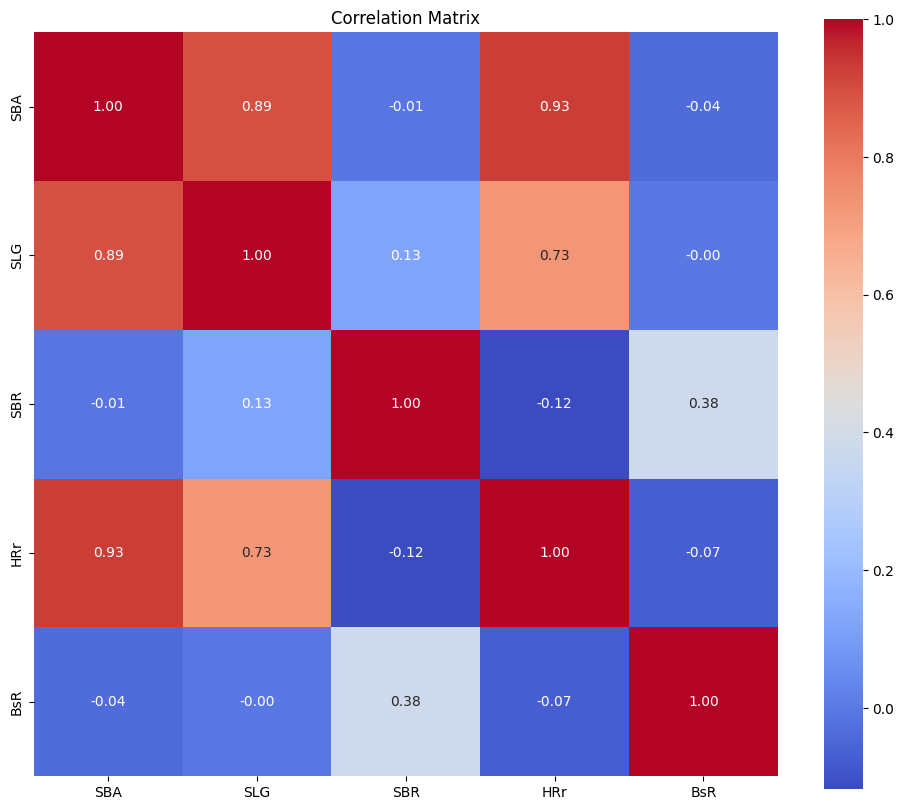

In [587]:
# 스케일링 후 상관계수를 시각화합니다.
plt.figure(figsize=(12, 10))
sns.heatmap(df_scaled.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## PCA

In [588]:
from sklearn.decomposition import PCA

n_components = 2
whiten = False
random_state = 42

pca = PCA(n_components=n_components, 
          whiten=whiten, 
          random_state=random_state)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1
0,0.220925,0.101337
1,0.101666,0.139437
2,0.001230,0.230977
3,0.191698,0.285046
4,0.162482,0.136851


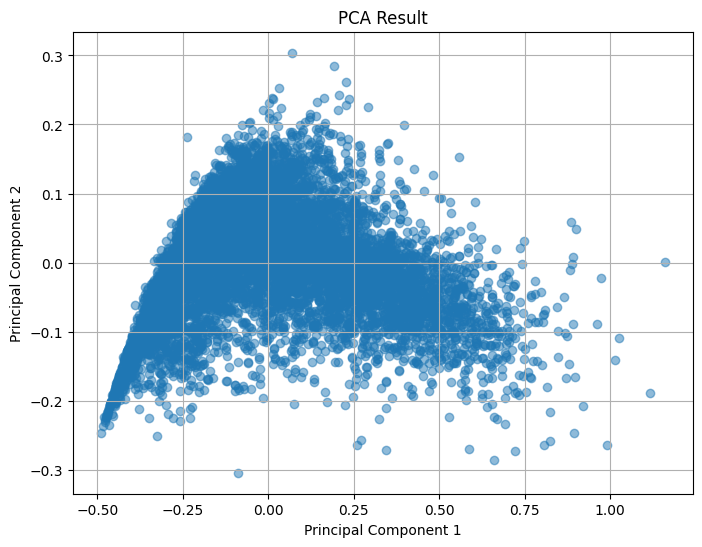

In [589]:
# PCA 결과를 시각화합니다.
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[0], df_pca[1], alpha=0.5)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# 여러 군집화 방법 적용해보고 비교하기

## k-means

### 엘보우 방법 활용

In [590]:
# 왜곡 값을 저장할 빈 리스트 선언
distortions = []

# 2에서 11까지의 군집 개수에 대해 KMeans 모델로 군집화한 경우 SSE를 저장:
from sklearn.cluster import KMeans

for n in range(2, 11):
    km = KMeans(n_clusters=n,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df_pca)

    # k-means 모델에 대한 SSE(inertia)를 리스트에 저장합니다.
    distortions.append(km.inertia_)

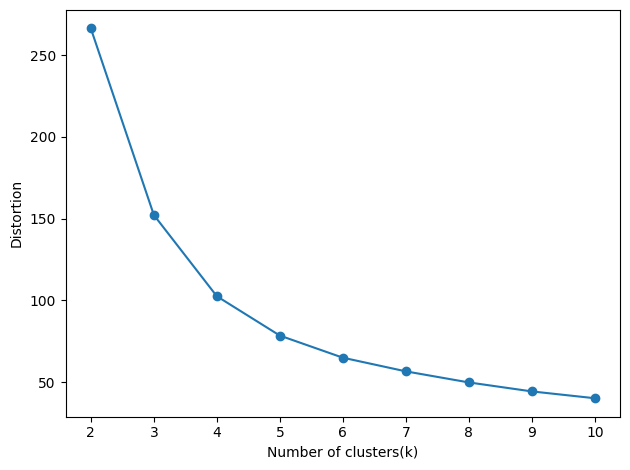

In [591]:
# SSE 값들을 그래프에 표시
import matplotlib.pyplot as plt

plt.plot(range(2, 11), distortions, marker='o')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

이번 데이터셋에서는 k=4로 두고 클러스터링을 진행하겠습니다.

In [592]:
# k=4로 k-means 모델을 학습합니다.
kmeans_data = df_pca.copy()

# k=4로 k-means 모델을 학습합니다.
# 다른 파라미터는 엘보우 방법에서 사용한 것과 동일하게 설정하여 k-means 모델을 학습합니다.
km = KMeans(n_clusters=4,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
km.fit(kmeans_data)

# 군집 레이블을 데이터프레임에 추가합니다.
kmeans_data['cluster'] = km.labels_

In [593]:
kmeans_data['cluster'].value_counts()

cluster
2    3406
1    2455
0    2051
3    1322
Name: count, dtype: int64

In [594]:
# 실루엣 계수를 계산합니다.
from sklearn.metrics import silhouette_score

# 클러스터 레이블을 제외한 데이터프레임을 사용하여 실루엣 계수를 계산합니다.
silhouette_km = silhouette_score(kmeans_data.iloc[:, :-1], kmeans_data['cluster'])
print(f"Silhouette Score for KMeans: {silhouette_km:.4f}")

Silhouette Score for KMeans: 0.4434


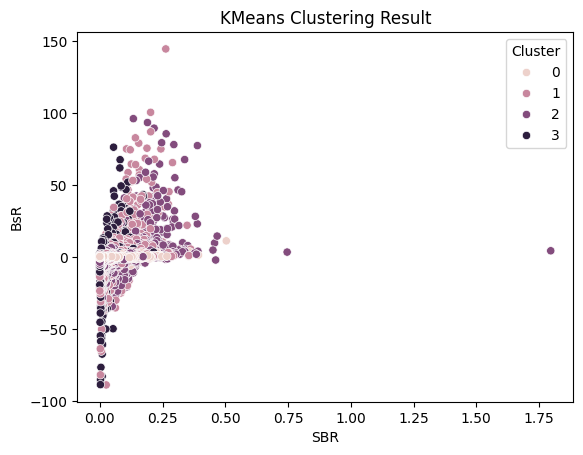

In [595]:
df['kmeans_cluster'] = km.labels_ # 원본 데이터에 군집 레이블 추가
# 군집화 결과를 시각화합니다.
sns.scatterplot(x = 'SBR', 
                y = 'BsR', 
                hue = 'kmeans_cluster', 
                data = df)
plt.title('KMeans Clustering Result')
plt.xlabel('SBR')
plt.ylabel('BsR')
plt.legend(title='Cluster')
plt.show()

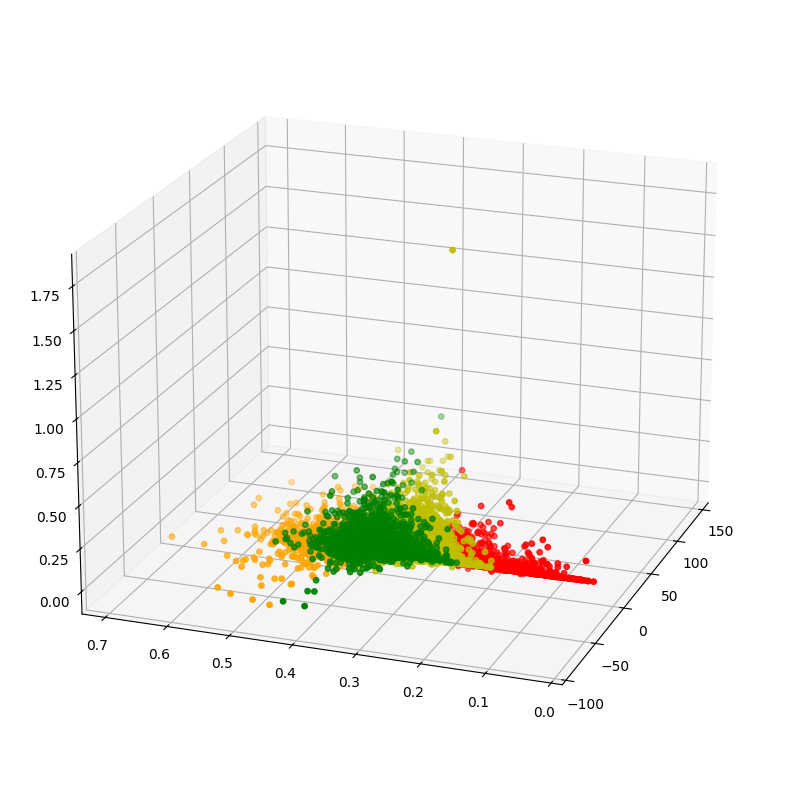

In [596]:
# 참고 : 3D 시각화

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
colors =['r','g','y','orange']

for i in range(4):
    marker_ind = df[df['kmeans_cluster']==i].index
    ax.scatter(df.loc[marker_ind, 'BsR'], df.loc[marker_ind, 'SLG'], df.loc[marker_ind, 'SBR'],  marker='o', s=15, color=colors[i])

ax.view_init(20, -160)
plt.show()

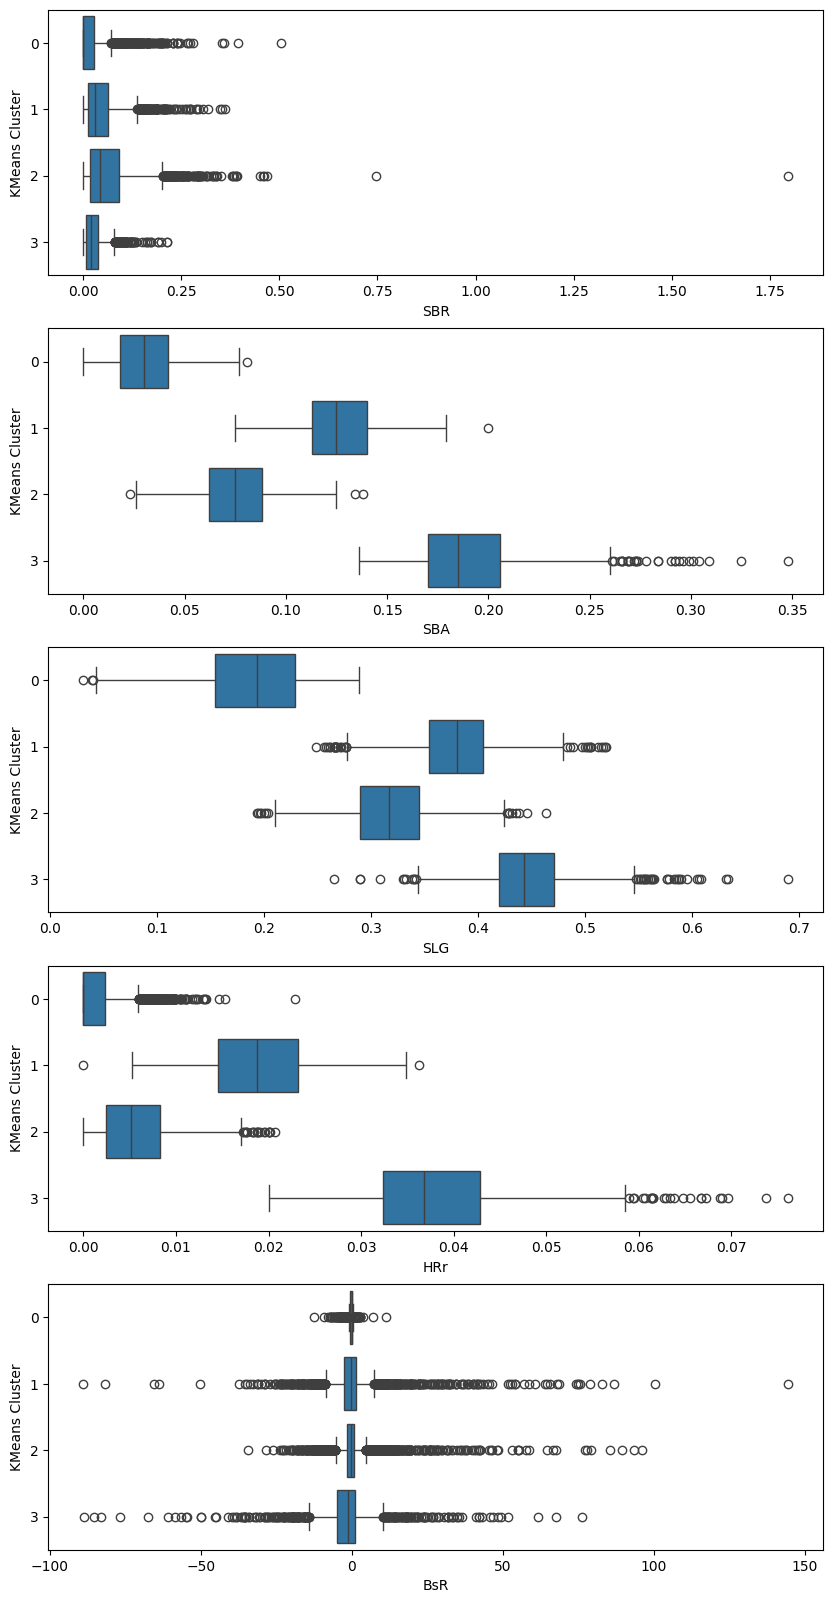

In [597]:
# 주요 스탯을 시각화합니다.

columns = ['SBR', 'SBA', 'SLG', 'HRr', 'BsR']

fig, ax = plt.subplots(nrows=len(columns), figsize=(10, 20))

for i, col in enumerate(columns[:]):
    sns.boxplot(data=df, y='kmeans_cluster', x=col, orient='h', ax=ax[i])
    # ax[i].set_title(f'Boxplot of {col} by GMM Cluster')
    ax[i].set_ylabel('KMeans Cluster')

plt.show()

### 위에서 군집화시킨 레이블들의 특성을 살펴봅시다.

예시:

- (슬러거) 장타율(SLG)이 높은 타자로, 홈런(담장을 넘기는 타구를 만들어내는 타자)을 잘 치는 선수<br>
- (날쌘돌이) : BsR 또는 도루율(SBR)이 높은 타자로, 빠른 발로 남들보다 한 발짝 더 나아갈 수 있는 선수.
- (호타준족) 발도 빠르고(BsR), 장타율(SLG)/홈런율(HRr)도 높은 선수. BSR,SBR,HRr,SLG가 전반적으로 모두 높다.
<br>
- (어중이떠중이...) 모든 지표가 낮은 선수.
- ...

---

sbr: 도루율
sba: 단타율
slg: 장타
HRr: 홈런율
BsR: 루율 및 속ㄷ도

- cluster 0 : 모든 지표가 낮은 선수
- cluster 1 : 모든 지표에서 2등으로 전반적인 특성이 좋은 선수
- cluster 2 : SBR, BsR이 높아 발 빠르지만 SBA, SLG, HRr, BsR은 좋지 않은 선수
- cluster 3 : SBR, BsR이 낮으므로 발 느리지만 단타, 장타, 홈런율(SBA, SLG, HRr)이 좋은 선수.

---

## DBSCAN

다른 군집화 방법도 적용해봅시다!

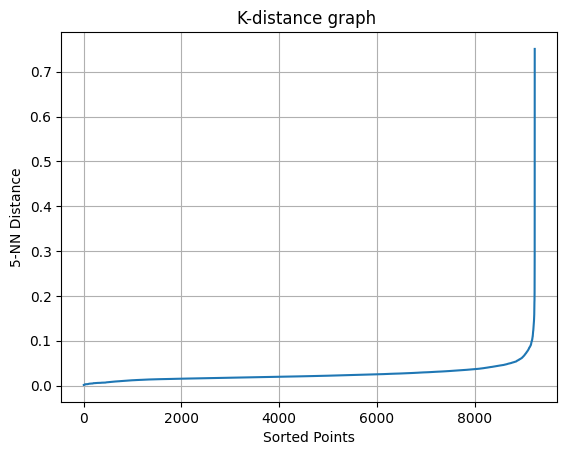

In [598]:
# eps 설정을 위해 작성해본 코드입니다.

from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np


neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)

k_distances = np.sort(distances[:, 4])  # 5번째 이웃 거리
plt.plot(k_distances)
plt.ylabel("5-NN Distance")
plt.xlabel("Sorted Points")
plt.title("K-distance graph ")
plt.grid()
plt.show()

In [599]:
# DBSCAN 클러스터링 진행
from sklearn.cluster import DBSCAN

dbscan_data = df_scaled.copy()

# 파라미터를 직접 설정하고 모델을 학습시켜봅시다.
dbscan = DBSCAN(eps=0.5, 
                min_samples=7, 
                metric='euclidean')
                 
y_pred_dbscan = dbscan.fit_predict(dbscan_data)
dbscan_data['cluster'] = y_pred_dbscan

In [600]:
# 결과 확인을 위해 작성해본 코드입니다.

labels = y_pred_dbscan
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print(f"총 클러스터 수 (노이즈 제외): {n_clusters}")
print(f"노이즈로 분류된 샘플 수: {n_noise}")
print("클러스터별 샘플 수:")
print(dbscan_data['cluster'].value_counts().sort_index())

총 클러스터 수 (노이즈 제외): 1
노이즈로 분류된 샘플 수: 1
클러스터별 샘플 수:
cluster
-1       1
 0    9233
Name: count, dtype: int64


In [601]:
mask = y_pred_dbscan != -1

In [602]:
# 클러스터 레이블을 제외한 데이터프레임을 사용하여 실루엣 계수를 계산합니다.
silhouette_dbscan = silhouette_score(dbscan_data.iloc[:, :-1], y_pred_dbscan)
print(f"DBSCAN Silhouette Score: {silhouette_dbscan:.4f}")

DBSCAN Silhouette Score: 0.6822


## HDBSCAN

In [603]:
# HDBSCAN 클러스터링 진행
import hdbscan

hdbscan_data = df_scaled.copy()

# 파라미터를 직접 설정하고 모델을 학습시켜봅시다.
hdb = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=5, metric='euclidean')
y_pred_hdb = hdb.fit_predict(hdbscan_data)
hdbscan_data['cluster'] = y_pred_hdb

C:\Users\leein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\leein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [604]:
labels = y_pred_hdb
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print(f"총 클러스터 수 (노이즈 제외): {n_clusters}")
print(f"노이즈로 분류된 샘플 수: {n_noise}")
print("클러스터별 샘플 수:")
print(hdbscan_data['cluster'].value_counts().sort_index())

총 클러스터 수 (노이즈 제외): 2
노이즈로 분류된 샘플 수: 4850
클러스터별 샘플 수:
cluster
-1    4850
 0      52
 1    4332
Name: count, dtype: int64


In [605]:
# 클러스터 레이블을 제외한 데이터프레임을 사용하여 실루엣 계수를 계산합니다.

silhouette_hdbscan = silhouette_score(hdbscan_data.iloc[:, :-1], y_pred_hdb)
print(f"HDBSCAN Silhouette Score: {silhouette_hdbscan:.4f}")

HDBSCAN Silhouette Score: -0.0289


## GMM

In [606]:
from sklearn.mixture import GaussianMixture

gmm_data = df_pca.copy()

# GMM 모델을 사용하여 군집화합니다.
gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(gmm_data)
gmm_labels = gmm.predict(gmm_data)
gmm_data['GMM_Labels'] = gmm_labels

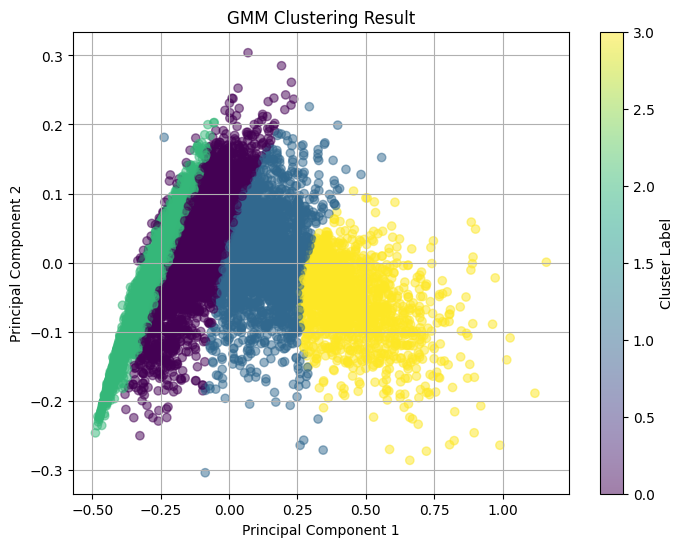

In [607]:
# GMM 결과를 시각화합니다.
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[0], df_pca[1], c=gmm_labels, cmap='viridis', alpha=0.5)
plt.title('GMM Clustering Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.colorbar(label='Cluster Label')
plt.show()

In [608]:
# GMM 모델을 적용한 경우 실루엣 점수를 계산합니다.

silhouette_gmm = silhouette_score(gmm_data.iloc[:, :-1], gmm_labels)
print(f"Silhouette Score for GMM: {silhouette_gmm:.4f}")

Silhouette Score for GMM: 0.3103


## 각 방법에 대해 실루엣 계수를 계산하고 비교해봅시다!

In [609]:
print("실루엣 계수 비교하기")
print(f"KMeans Silhouette Score: {silhouette_km:.4f}")
print(f"DBSCAN Silhouette Score: {silhouette_dbscan:.4f}")
print(f"HDBSCAN Silhouette Score: {silhouette_hdbscan:.4f}")
print(f"GMM Silhouette Score: {silhouette_gmm:.4f}")

실루엣 계수 비교하기
KMeans Silhouette Score: 0.4434
DBSCAN Silhouette Score: 0.6822
HDBSCAN Silhouette Score: -0.0289
GMM Silhouette Score: 0.3103


In [611]:
# 가장 높은 실루엣 계수를 가진 군집화 방법을 선택합니다.
# 해당 방법의 결과를 원본 데이터에 추가합니다.
df['dbscan_cluster'] = dbscan_data['cluster']

---

### 수고하셨습니다!